1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


Integral of the original histogram: 196.0
Integral of the normalized gaussian function: 196.0


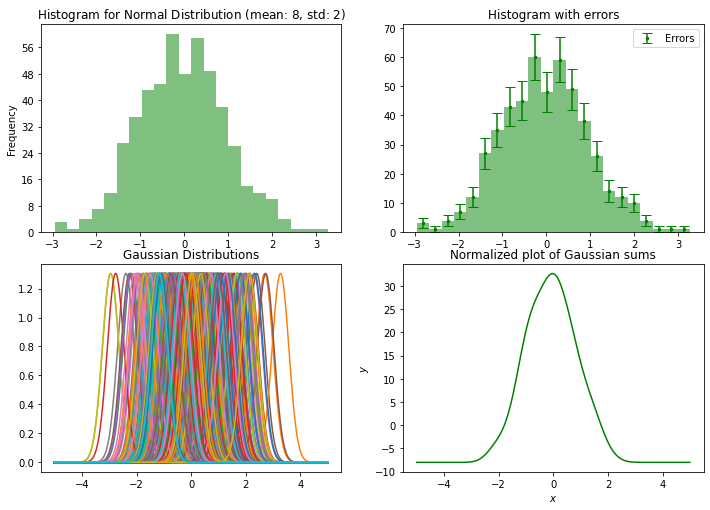

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from matplotlib.ticker import MaxNLocator
import scipy as sp
from scipy.stats import norm

#1) Fill a numpy array 

N = 500
mean = 0
std = 1
x =  np.random.normal(loc=mean, scale=std, size=N)

#2) Fill an histogram

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,7))

#Number of bins
n_bins = int(math.sqrt(N))

#entries = values of histogram bins , edges = edges of the bins
entries, edges, _ = ax1.hist(x, bins=n_bins, color='g',alpha=0.5) 

ax1.set_title('Histogram for Normal Distribution (mean: $8$, std: $2$)')
fig.tight_layout()

#A proper y axis label
ax1.set_ylabel('Frequency')

#A proper value of y axis major ticks labels 
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

#display the histograms as data points with errors
bin_centers = 0.5 * (edges[:-1] + edges[1:]) # calculate bin centers

#draw errobars (use the sqrt error)
yerr = np.sqrt(entries)
ax2.hist(x, bins=n_bins, color='g',alpha=0.5) 
ax2.errorbar(bin_centers, entries, yerr, fmt='g.', markersize=5, capsize=5,label="Errors")
ax2.legend()
ax2.set_title('Histogram with errors')

#2) 3) For every element of x, create a gaussian. In a separate plot plot all the gaussian functions so obtained.

x_ = np.linspace(-5, 5, 1000)
y_pdf = []

for i in range(0,N):
    y_pdf.append( norm.pdf(x_, loc=x[i], scale=1.06*std*N**(-1/5)))
    ax3.plot(x_, y_pdf[i], label='pdf')
    ax3.set_title('Gaussian Distributions')

#4) Sum (with np.sum()) all the gaussian functions and normalize the result 

mu, sigma = 0,1
x_norm = np.random.normal(mu,sigma,100)

x1_ = np.linspace(-5,5,np.size(x_norm))
y_pdf=[]
n=0
for i in x_norm:
    n+=1
    mean = i
    std = 1.06 * (np.std(x_norm)) * (np.size(x_norm))**(-1/5.)
    y_pdf.append([i,norm.pdf(x1_,loc=i,scale=std)])
    gauss_sum = np.sum(y_pdf)

area_gauss = abs(sp.integrate.trapz(gauss_sum,x=None,dx = 1.0, axis = -1))
area_hist = sum(np.diff(edges)*entries)
c = area_gauss/area_hist
area_hist*=c
ax4.plot(x1_,gauss_sum,color='g')
ax4.set_title('Normalized plot of Gaussian sums')
ax4.set_ylabel('$y$')
ax4.set_xlabel('$x$')


print("Integral of the original histogram:", round(area_hist))
print("Integral of the normalized gaussian function:",round(area_gauss))

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

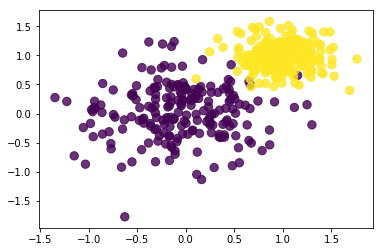

In [11]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

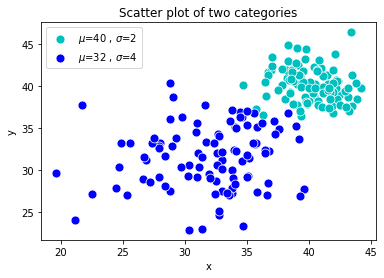

In [12]:
import pandas as pd
import seaborn as sns

#Function gauss generates a 2D datasets of 2 categories, each distribute as a 2D gaussian with a given mean and std
def gauss(mu,sigma,n):
    x = np.random.normal(mu,sigma,n).T
    y = np.random.normal(mu,sigma,n).T
    xy = np.vstack((x,y)).T
    return xy


#I display the dataset in a scatter plot
category1 = gauss(40,2,100)
category2 = gauss(32,4,100)

data1 = np.concatenate((category1,category2),axis=1)
data2 = pd.DataFrame(data=data1, columns=['x1','y1','x2','y2'])

sns.scatterplot(x='x1',y='y1',data=data2,s=80,color='c')
sns.scatterplot(x='x2',y='y2',data=data2,s=80,color='b')

plt.legend(labels=['$\mu$=40 , $\sigma$=2', '$\mu$=32 , $\sigma$=4 '])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of two categories')
plt.show()

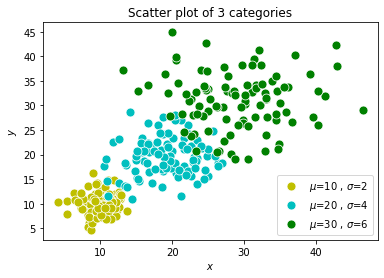

In [13]:
#I try to make the procedure with 3  of categories
cat1 = gauss(10,2,100)
cat2 = gauss(20,4,100)
cat3 = gauss(30,6,100)

data1 = np.concatenate((cat1,cat2,cat3),axis=1)
data2 = pd.DataFrame(data=data1, columns=['x1','y1','x2','y2','$y$','$x$'])

sns.scatterplot(x='x1',y='y1',data=data2,s=80,color='y')
sns.scatterplot(x='x2',y='y2',data=data2,s=80,color='c')
sns.scatterplot(x='$x$',y='$y$',data=data2,s=80,color='g')

plt.legend(labels=['$\mu$=10 , $\sigma$=2', '$\mu$=20 , $\sigma$=4', '$\mu$=30 , $\sigma$=6'])
plt.title('Scatter plot of 3 categories')
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

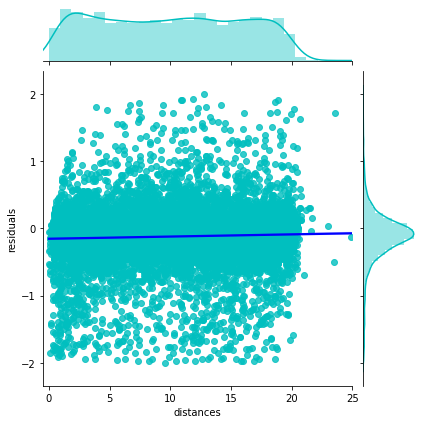

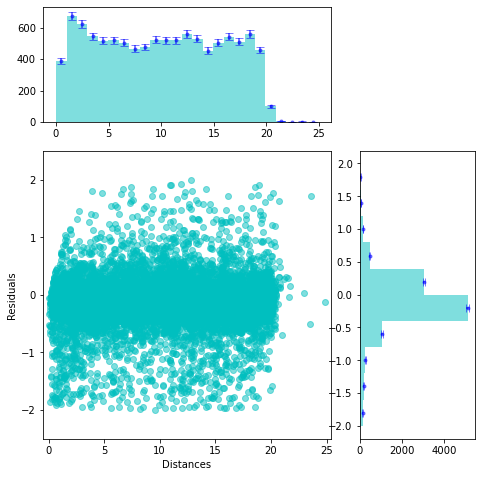

In [51]:
from scipy import stats
import IPython

#Load the dataset in a pandas dataframe
np_array = np.load('residuals_261.npy',allow_pickle=True)
df = pd.DataFrame(np_array.item())

#Clean the sample by selecting the rows with variable "residual" in absolute value smaller than 2 
df_clean = df.loc[(abs(df['residuals']) < 2)]
df_clean

#Linear regression of "residuals" versus "distances"
slope, intercept, r_value, p_value, std_err = stats.linregress(df['residuals'], df['distances'])

#Plot a seaborn jointplot. The result of the regression should be displayed on the plot
sns.jointplot(data=df_clean,x="distances", y="residuals",  kind="reg", xlim=[-0.5,25], color='c',joint_kws={'line_kws':{'color':'b'}})

#Fill 3 numpy arrays

#1) x = array of bin centers for the "distance" variable
df = df[df['distances'] <= 20]
x = np.arange(0,21,1)
df['bins'] = pd.cut(df['distances'],x)

#2) y = mean values of the "residuals", estimated in slices (bins) of "distance"
df1 = df.groupby(['bins']).mean()
df1.reset_index(inplace=True)

#3) erry = standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
df2 = df.groupby(['bins']).std()
df2.reset_index(inplace=True)

df2 = df2.rename(columns = {'bins':'bins'})
df1['std']=df2['residuals']
x1 = np.arange(0,20,1)
df1['x_pos'] = x1

x=df1['x_pos']
y=df1['residuals']
erry=df1['std']

#Plot the profile plot on top of the scatter plot

x = df_clean['distances']
y = df_clean['residuals']

#Dimension of plots
left, width = 0.1, 0.5
bottom, height = 0.1, 0.5
spacing = 0.05 #space between scatter plot and histograms

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

plt.figure(figsize=(8,8))

ax_scatter = plt.axes(rect_scatter)
ax_histx = plt.axes(rect_histx)
ax_histy = plt.axes(rect_histy)

#Scatter plot
ax_scatter.scatter(x, y,color='c',alpha=0.5)

#Limits of scatter plot
ax_scatter.set_xlim((min(x)-0.5, max(x)+0.5))
ax_scatter.set_ylim((-2.5,2.5))

#Labels of scatter plot
ax_scatter.set_xlabel("Distances")
ax_scatter.set_ylabel("Residuals")

#Number of bins for histograms 
binx=int(np.sqrt(len(x)))
biny=int(np.sqrt(len(y)))
#Those numbers are too high, the histograms will not be very clearly with them. Insted, we use:
binx = 25
biny = 10

#Histograms
nx, edges_x, _ = ax_histx.hist(x, bins=binx,color='c',alpha=0.5)

ny, edges_y, _ = ax_histy.hist(y, bins=biny, orientation='horizontal',color='c',alpha=0.5)

#plot of errorbar on top of histograms
bincenters_x = 0.5*(edges_x[1:] + edges_x[:-1])
std_x = np.sqrt(nx)
ax_histx.errorbar(bincenters_x, nx, yerr=std_x, fmt='.b', alpha= 0.5, elinewidth=2,capsize=4 ); 

bincenters_y = 0.5*(edges_y[1:]+edges_y[:-1])
std_y = np.sqrt(ny)
ax_histy.errorbar(ny, bincenters_y, xerr=std_y,fmt='.b',alpha= 0.5,elinewidth=2,capsize=4); 


plt.show()
